In forward selection, variables are progressively incorporated into larger and larger subsets. The
algorithms start by training all possible single-variable machine learning models. Then, it selects
the feature that returned the best performing classifier or regression model. In the second step, it
creates machine learning models for all combinations of the features from the previous step with
all remaining variables in the data. It selects the pair of features that produce the best performing
algorithm. And it continues, adding 1 feature at a time to the feature subset from the previous step
until a stopping criteria is met.

The feature subsets are nested because they include the feature or features from the previous steps.
By progressively evaluating promising features, forward feature selection is more efficient than
exhaustive search.

Forward feature selection has the advantage that, by starting with smaller feature subsets, it is more
computationally efficient than other wrapper methods. However, for this same reason, it does not
contemplate feature interactions. Or at least not until sufficient features have been added to the
subset.

Forward feature selection needs a criteria to stop the search. The most obvious stopping condition
is when the performance of the classifier or regression model does not improve beyond a certain

threshold. This has the advantage of focusing the search on performance. On the downside, the
threshold for improvement is arbitrarily set by the user. Alternatively, we can stop the search after
a certain number of features have been selected.

In the coming paragraphs, we will implement forwardfeature selection with Scikit-learn and
MLXtend. The 2 Python implementations are very similar. Both offer a number of features as
stopping criteria. Scikit-learn also offers a threshold on performance improvement as a method to
stop the search.

# Import libraries

In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Import data

In [2]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [3]:

X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

X_train.shape, X_test.shape

((14835, 80), (6358, 80))

# Forward feature selection

In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [5]:
# step forward feature selection

sfs = SFS(
    estimator=RandomForestRegressor(n_estimators=5, random_state=0),
    k_features=35,  # the number of features to retain
    forward=True, # the direction of  the search
    verbose=1,  # print out intermediate steps
    scoring='r2',
    cv=3,
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   22.9s finished
Features: 1/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   31.9s finished
Features: 2/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   44.9s finished
Features: 3/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   58.2s finished
Features: 4/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:  1.1min finished
Features: 5/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.3min finished
Features: 6/35[Parallel(

In [6]:
sfs.k_feature_names_

('mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'range_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'gmean_fie',
 'wtd_gmean_fie',
 'range_fie',
 'std_fie',
 'wtd_std_fie',
 'mean_atomic_radius',
 'gmean_atomic_radius',
 'entropy_atomic_radius',
 'gmean_Density',
 'entropy_Density',
 'range_Density',
 'wtd_std_Density',
 'wtd_mean_ElectronAffinity',
 'gmean_ElectronAffinity',
 'range_ElectronAffinity',
 'std_ElectronAffinity',
 'range_FusionHeat',
 'wtd_std_FusionHeat',
 'mean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'wtd_range_ThermalConductivity',
 'std_ThermalConductivity',
 'mean_Valence',
 'wtd_mean_Valence',
 'gmean_Valence',
 'entropy_Valence',
 'range_Valence',
 'std_Valence')

In [7]:
X_train_t = sfs.transform(X_train)
X_test_t = sfs.transform(X_test)

X_test_t

array([[76.5177175 , 87.41587988, 65.41137811, ...,  1.36892236,
         1.        ,  0.4330127 ],
       [67.4025    , 67.4025    , 66.40422577, ...,  0.63651417,
         3.        ,  1.5       ],
       [89.33718   , 82.94251571, 69.13330879, ...,  1.56495725,
         2.        ,  0.8       ],
       ...,
       [90.30468   , 85.92509   , 64.31362755, ...,  1.56495725,
         2.        ,  0.8       ],
       [63.45766667, 68.46450649, 66.73940342, ...,  1.01140426,
         4.        ,  1.63299316],
       [69.17125   , 51.77830016, 35.42963674, ...,  1.5941667 ,
         1.        ,  0.4       ]])

In [8]:
X_train_t.shape, X_test_t.shape

((14835, 35), (6358, 35))

# Scaling

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_t)

X_test_sc=min_max_scaler.fit_transform(X_test_t)

In [10]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline model

In [11]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor

In [12]:
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)

In [13]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [14]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.1059
Test MAE (LR_baseline) : 0.1147 

Train R^2 (LR_baseline): 0.6716
Test R^2 (LR_baseline) : 0.6332 



# Cross-Validation

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
# Assuming you have defined X_train_sc and y_train_sc

list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'neg_mean_squared_error', 'neg_mean_absolute_error'])

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_sc,
        y=y_train_sc,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
        cv=30,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = [
        np.mean(cv_result['fit_time']),
        np.mean(cv_result['score_time']),
        np.mean(cv_result['test_neg_mean_squared_error']),
        np.mean(cv_result['test_neg_mean_absolute_error'])  # Removed the negative sign here
    ]

print(cv_results)

                            fit_time  score_time  neg_mean_squared_error  \
RandomForestRegressor      45.892902    0.066034               -0.004685   
XGBRegressor                7.670053    0.007209               -0.005140   
KNeighborsRegressor         0.092373    0.048569               -0.006610   
LGBMRegressor               0.816087    0.010529               -0.005852   
SVR                        11.068261    0.818087               -0.012106   
DecisionTreeRegressor       0.517493    0.002578               -0.006928   
GradientBoostingRegressor  14.625863    0.004393               -0.009047   

                           neg_mean_absolute_error  
RandomForestRegressor                    -0.038035  
XGBRegressor                             -0.043551  
KNeighborsRegressor                      -0.045641  
LGBMRegressor                            -0.049047  
SVR                                      -0.080473  
DecisionTreeRegressor                    -0.043362  
GradientBoostingRegr

In [31]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=7,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                   fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  44.53564    0.056365               -0.005032


# RandomForestRegressor

In [19]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_15516\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.011237226379743838
Mean Absolute Error (MAE): 0.07225068849469289
R-squared (R2): 0.8054612070099079
mape: 10.340489344281465


# XGBRegressor

In [20]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.01077024919916864
Mean Absolute Error (MAE): 0.07130065998413858
R-squared (R2): 0.8135455130470962
mape: 11.086747942294432


In [32]:
from hyperopt import hp, fmin, rand, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from tqdm import tqdm  


param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}


def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}


trials = Trials()


num_iterations = 50  


best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=rand.suggest,  # Use random search for faster optimization
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|█████████████████████████████████████████████████████████| 50/50 [04:15<00:00,  5.11s/iter]

Best hyperparameters: {'alpha': 0.007651453260313892, 'eta': 0.09311043374339552, 'gamma': 0.0013080815520494986, 'lambda': 0.10598957203411576, 'learning_rate': 0.15821389839843647, 'max_delta_step': 0.6270607745614198, 'max_depth': 13.0, 'min_child_weight': 8.0, 'tree_method': 0}
Best MSE score: 0.004890467461454412


# CatBoostRegressor

In [15]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.2226218	total: 167ms	remaining: 33.3s
50:	learn: 0.0916666	total: 475ms	remaining: 1.39s
100:	learn: 0.0828341	total: 745ms	remaining: 731ms
150:	learn: 0.0764077	total: 1.03s	remaining: 335ms
199:	learn: 0.0723435	total: 1.36s	remaining: 0us
Mean Squared Error (MSE): 0.009848322317103227
Mean Absolute Error (MAE): 0.06773920084060082
R-squared (R2): 0.8295059054785792
mape: 6.8687586397686315


In [16]:
scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform( y_pred_3.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0           38.00    40.688531
1           13.40     7.968314
2           69.50    53.115132
3           92.80    73.378652
4           68.00    53.417344
...           ...          ...
6353        25.00    41.039917
6354         1.27     2.529836
6355        20.00    33.921946
6356         4.15     3.476561
6357        82.00    72.792383

[6358 rows x 2 columns]


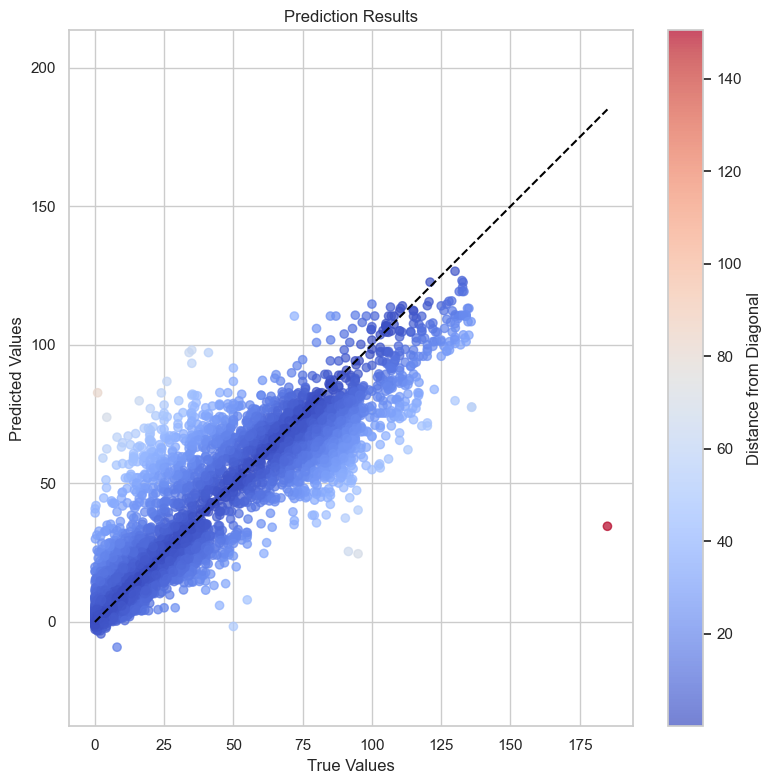

In [17]:
result_df['distance'] = np.abs(result_df['y_test_unsc'] - result_df['y_pred_unsc'])


plt.figure(figsize=(8, 8))
plt.scatter(result_df['y_test_unsc'], result_df['y_pred_unsc'], c=result_df['distance'], cmap='coolwarm', alpha=0.7)
plt.plot([min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         [min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         color='black', linestyle='--')
plt.colorbar(label='Distance from Diagonal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Results')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [22]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define the hyperparameter search space
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50, 
    scoring='neg_mean_squared_error',
    cv=5, 
    n_jobs=-1, 
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.2346044	total: 36.9ms	remaining: 36.9s
1:	learn: 0.2298722	total: 82.1ms	remaining: 41s
2:	learn: 0.2252391	total: 129ms	remaining: 43s
3:	learn: 0.2207108	total: 173ms	remaining: 43.1s
4:	learn: 0.2163986	total: 228ms	remaining: 45.3s
5:	learn: 0.2121456	total: 282ms	remaining: 46.8s
6:	learn: 0.2078715	total: 321ms	remaining: 45.6s
7:	learn: 0.2038434	total: 367ms	remaining: 45.5s
8:	learn: 0.1999051	total: 414ms	remaining: 45.6s
9:	learn: 0.1959810	total: 455ms	remaining: 45s
10:	learn: 0.1921181	total: 509ms	remaining: 45.7s
11:	learn: 0.1883965	total: 550ms	remaining: 45.2s
12:	learn: 0.1848179	total: 589ms	remaining: 44.7s
13:	learn: 0.1813211	total: 648ms	remaining: 45.6s
14:	learn: 0.1781912	total: 696ms	remaining: 45.7s
15:	learn: 0.1748513	total: 741ms	remaining: 45.5s
16:	learn: 0.1718452	total: 785ms	remaining: 45.4s
17:	learn: 0.1687507	total: 835ms	remaining: 45.6s
18:	learn: 0.1658027	total: 889ms	remaining: 45.9s
19:	learn: 0.1630928	total: 933ms	remaining: 

166:	learn: 0.0667720	total: 8.48s	remaining: 42.3s
167:	learn: 0.0667203	total: 8.51s	remaining: 42.2s
168:	learn: 0.0666060	total: 8.56s	remaining: 42.1s
169:	learn: 0.0665064	total: 8.6s	remaining: 42s
170:	learn: 0.0664553	total: 8.63s	remaining: 41.9s
171:	learn: 0.0663982	total: 8.68s	remaining: 41.8s
172:	learn: 0.0662710	total: 8.72s	remaining: 41.7s
173:	learn: 0.0661584	total: 8.78s	remaining: 41.7s
174:	learn: 0.0661106	total: 8.82s	remaining: 41.6s
175:	learn: 0.0660254	total: 8.86s	remaining: 41.5s
176:	learn: 0.0659768	total: 8.9s	remaining: 41.4s
177:	learn: 0.0658727	total: 8.95s	remaining: 41.3s
178:	learn: 0.0658210	total: 8.99s	remaining: 41.2s
179:	learn: 0.0657714	total: 9.03s	remaining: 41.1s
180:	learn: 0.0657067	total: 9.07s	remaining: 41s
181:	learn: 0.0656213	total: 9.11s	remaining: 41s
182:	learn: 0.0655297	total: 9.15s	remaining: 40.9s
183:	learn: 0.0654327	total: 9.2s	remaining: 40.8s
184:	learn: 0.0653145	total: 9.24s	remaining: 40.7s
185:	learn: 0.0652144

329:	learn: 0.0575271	total: 14.9s	remaining: 30.2s
330:	learn: 0.0575021	total: 14.9s	remaining: 30.1s
331:	learn: 0.0574753	total: 14.9s	remaining: 30.1s
332:	learn: 0.0574237	total: 15s	remaining: 30s
333:	learn: 0.0573903	total: 15s	remaining: 29.9s
334:	learn: 0.0573303	total: 15s	remaining: 29.9s
335:	learn: 0.0572575	total: 15.1s	remaining: 29.8s
336:	learn: 0.0571930	total: 15.1s	remaining: 29.8s
337:	learn: 0.0571560	total: 15.2s	remaining: 29.7s
338:	learn: 0.0570718	total: 15.2s	remaining: 29.7s
339:	learn: 0.0570181	total: 15.2s	remaining: 29.6s
340:	learn: 0.0569505	total: 15.3s	remaining: 29.6s
341:	learn: 0.0569017	total: 15.3s	remaining: 29.5s
342:	learn: 0.0568361	total: 15.4s	remaining: 29.4s
343:	learn: 0.0567892	total: 15.4s	remaining: 29.4s
344:	learn: 0.0567432	total: 15.4s	remaining: 29.3s
345:	learn: 0.0567085	total: 15.5s	remaining: 29.2s
346:	learn: 0.0566224	total: 15.5s	remaining: 29.2s
347:	learn: 0.0565783	total: 15.5s	remaining: 29.1s
348:	learn: 0.056535

488:	learn: 0.0506785	total: 20.1s	remaining: 21s
489:	learn: 0.0506528	total: 20.1s	remaining: 21s
490:	learn: 0.0506361	total: 20.2s	remaining: 20.9s
491:	learn: 0.0506200	total: 20.2s	remaining: 20.8s
492:	learn: 0.0506064	total: 20.2s	remaining: 20.8s
493:	learn: 0.0505525	total: 20.2s	remaining: 20.7s
494:	learn: 0.0505418	total: 20.3s	remaining: 20.7s
495:	learn: 0.0505263	total: 20.3s	remaining: 20.6s
496:	learn: 0.0505023	total: 20.3s	remaining: 20.5s
497:	learn: 0.0504400	total: 20.3s	remaining: 20.5s
498:	learn: 0.0504253	total: 20.4s	remaining: 20.4s
499:	learn: 0.0503806	total: 20.4s	remaining: 20.4s
500:	learn: 0.0503487	total: 20.4s	remaining: 20.4s
501:	learn: 0.0503032	total: 20.5s	remaining: 20.3s
502:	learn: 0.0502481	total: 20.5s	remaining: 20.3s
503:	learn: 0.0502359	total: 20.5s	remaining: 20.2s
504:	learn: 0.0502235	total: 20.5s	remaining: 20.1s
505:	learn: 0.0501894	total: 20.6s	remaining: 20.1s
506:	learn: 0.0501550	total: 20.6s	remaining: 20s
507:	learn: 0.0501

653:	learn: 0.0467343	total: 25s	remaining: 13.2s
654:	learn: 0.0467213	total: 25.1s	remaining: 13.2s
655:	learn: 0.0467072	total: 25.1s	remaining: 13.2s
656:	learn: 0.0466630	total: 25.1s	remaining: 13.1s
657:	learn: 0.0466365	total: 25.1s	remaining: 13.1s
658:	learn: 0.0466313	total: 25.2s	remaining: 13s
659:	learn: 0.0466127	total: 25.2s	remaining: 13s
660:	learn: 0.0465982	total: 25.2s	remaining: 12.9s
661:	learn: 0.0465910	total: 25.3s	remaining: 12.9s
662:	learn: 0.0465855	total: 25.3s	remaining: 12.8s
663:	learn: 0.0465642	total: 25.3s	remaining: 12.8s
664:	learn: 0.0465440	total: 25.3s	remaining: 12.8s
665:	learn: 0.0465301	total: 25.4s	remaining: 12.7s
666:	learn: 0.0465230	total: 25.4s	remaining: 12.7s
667:	learn: 0.0464796	total: 25.4s	remaining: 12.6s
668:	learn: 0.0464688	total: 25.5s	remaining: 12.6s
669:	learn: 0.0464456	total: 25.5s	remaining: 12.6s
670:	learn: 0.0464290	total: 25.5s	remaining: 12.5s
671:	learn: 0.0464089	total: 25.6s	remaining: 12.5s
672:	learn: 0.0463

815:	learn: 0.0441287	total: 30.3s	remaining: 6.82s
816:	learn: 0.0441224	total: 30.3s	remaining: 6.79s
817:	learn: 0.0441020	total: 30.3s	remaining: 6.75s
818:	learn: 0.0440818	total: 30.4s	remaining: 6.71s
819:	learn: 0.0440561	total: 30.4s	remaining: 6.68s
820:	learn: 0.0440311	total: 30.5s	remaining: 6.64s
821:	learn: 0.0440068	total: 30.5s	remaining: 6.61s
822:	learn: 0.0439912	total: 30.5s	remaining: 6.57s
823:	learn: 0.0439779	total: 30.6s	remaining: 6.53s
824:	learn: 0.0439496	total: 30.6s	remaining: 6.49s
825:	learn: 0.0439345	total: 30.6s	remaining: 6.45s
826:	learn: 0.0439168	total: 30.7s	remaining: 6.42s
827:	learn: 0.0438925	total: 30.7s	remaining: 6.38s
828:	learn: 0.0438793	total: 30.7s	remaining: 6.34s
829:	learn: 0.0438677	total: 30.8s	remaining: 6.3s
830:	learn: 0.0438583	total: 30.8s	remaining: 6.26s
831:	learn: 0.0438346	total: 30.8s	remaining: 6.22s
832:	learn: 0.0438263	total: 30.9s	remaining: 6.19s
833:	learn: 0.0438081	total: 30.9s	remaining: 6.15s
834:	learn: 0

976:	learn: 0.0420993	total: 35s	remaining: 823ms
977:	learn: 0.0420966	total: 35s	remaining: 787ms
978:	learn: 0.0420922	total: 35s	remaining: 751ms
979:	learn: 0.0420874	total: 35s	remaining: 715ms
980:	learn: 0.0420760	total: 35.1s	remaining: 679ms
981:	learn: 0.0420674	total: 35.1s	remaining: 643ms
982:	learn: 0.0420515	total: 35.1s	remaining: 607ms
983:	learn: 0.0420350	total: 35.2s	remaining: 572ms
984:	learn: 0.0420237	total: 35.2s	remaining: 536ms
985:	learn: 0.0420198	total: 35.2s	remaining: 500ms
986:	learn: 0.0420074	total: 35.2s	remaining: 464ms
987:	learn: 0.0419868	total: 35.3s	remaining: 428ms
988:	learn: 0.0419746	total: 35.3s	remaining: 393ms
989:	learn: 0.0419710	total: 35.3s	remaining: 357ms
990:	learn: 0.0419575	total: 35.4s	remaining: 321ms
991:	learn: 0.0419403	total: 35.4s	remaining: 285ms
992:	learn: 0.0419267	total: 35.4s	remaining: 250ms
993:	learn: 0.0419115	total: 35.4s	remaining: 214ms
994:	learn: 0.0419085	total: 35.5s	remaining: 178ms
995:	learn: 0.041904

In [23]:
best_hyperparameters = {
    'bagging_temperature': 0.6899520655819377,
    'border_count': 71,
    'depth': 10,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 6.5683863303036025,
    'learning_rate': 0.028476532679981296,
    'min_data_in_leaf': 17,
}


model_3_tun = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun.fit(X_train_sc, y_train_sc)


y_pred_3_tun = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun)
r2 = r2_score(y_test_sc, y_pred_3_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.2346044	total: 31ms	remaining: 30.9s
1:	learn: 0.2298722	total: 58.5ms	remaining: 29.2s
2:	learn: 0.2252391	total: 88.9ms	remaining: 29.5s
3:	learn: 0.2207108	total: 117ms	remaining: 29.1s
4:	learn: 0.2163986	total: 151ms	remaining: 30.1s
5:	learn: 0.2121456	total: 180ms	remaining: 29.9s
6:	learn: 0.2078715	total: 205ms	remaining: 29.1s
7:	learn: 0.2038434	total: 235ms	remaining: 29.1s
8:	learn: 0.1999051	total: 269ms	remaining: 29.6s
9:	learn: 0.1959810	total: 299ms	remaining: 29.6s
10:	learn: 0.1921181	total: 330ms	remaining: 29.7s
11:	learn: 0.1883965	total: 359ms	remaining: 29.5s
12:	learn: 0.1848179	total: 389ms	remaining: 29.5s
13:	learn: 0.1813211	total: 430ms	remaining: 30.3s
14:	learn: 0.1781912	total: 465ms	remaining: 30.6s
15:	learn: 0.1748513	total: 495ms	remaining: 30.4s
16:	learn: 0.1718452	total: 528ms	remaining: 30.5s
17:	learn: 0.1687507	total: 565ms	remaining: 30.8s
18:	learn: 0.1658027	total: 604ms	remaining: 31.2s
19:	learn: 0.1630928	total: 636ms	remain

162:	learn: 0.0670207	total: 6.7s	remaining: 34.4s
163:	learn: 0.0669309	total: 6.74s	remaining: 34.3s
164:	learn: 0.0668627	total: 6.77s	remaining: 34.3s
165:	learn: 0.0668100	total: 6.8s	remaining: 34.2s
166:	learn: 0.0667720	total: 6.83s	remaining: 34s
167:	learn: 0.0667203	total: 6.86s	remaining: 34s
168:	learn: 0.0666060	total: 6.89s	remaining: 33.9s
169:	learn: 0.0665064	total: 6.93s	remaining: 33.9s
170:	learn: 0.0664553	total: 6.96s	remaining: 33.8s
171:	learn: 0.0663982	total: 7s	remaining: 33.7s
172:	learn: 0.0662710	total: 7.04s	remaining: 33.6s
173:	learn: 0.0661584	total: 7.08s	remaining: 33.6s
174:	learn: 0.0661106	total: 7.11s	remaining: 33.5s
175:	learn: 0.0660254	total: 7.15s	remaining: 33.5s
176:	learn: 0.0659768	total: 7.18s	remaining: 33.4s
177:	learn: 0.0658727	total: 7.22s	remaining: 33.3s
178:	learn: 0.0658210	total: 7.25s	remaining: 33.3s
179:	learn: 0.0657714	total: 7.29s	remaining: 33.2s
180:	learn: 0.0657067	total: 7.32s	remaining: 33.1s
181:	learn: 0.0656213

327:	learn: 0.0576272	total: 12.1s	remaining: 24.7s
328:	learn: 0.0575795	total: 12.1s	remaining: 24.6s
329:	learn: 0.0575271	total: 12.1s	remaining: 24.6s
330:	learn: 0.0575021	total: 12.1s	remaining: 24.5s
331:	learn: 0.0574753	total: 12.2s	remaining: 24.5s
332:	learn: 0.0574237	total: 12.2s	remaining: 24.4s
333:	learn: 0.0573903	total: 12.2s	remaining: 24.4s
334:	learn: 0.0573303	total: 12.2s	remaining: 24.3s
335:	learn: 0.0572575	total: 12.3s	remaining: 24.3s
336:	learn: 0.0571930	total: 12.3s	remaining: 24.2s
337:	learn: 0.0571560	total: 12.3s	remaining: 24.2s
338:	learn: 0.0570718	total: 12.4s	remaining: 24.1s
339:	learn: 0.0570181	total: 12.4s	remaining: 24.1s
340:	learn: 0.0569505	total: 12.5s	remaining: 24.1s
341:	learn: 0.0569017	total: 12.5s	remaining: 24s
342:	learn: 0.0568361	total: 12.5s	remaining: 24s
343:	learn: 0.0567892	total: 12.5s	remaining: 23.9s
344:	learn: 0.0567432	total: 12.6s	remaining: 23.9s
345:	learn: 0.0567085	total: 12.6s	remaining: 23.8s
346:	learn: 0.05

491:	learn: 0.0506200	total: 16.5s	remaining: 17s
492:	learn: 0.0506064	total: 16.5s	remaining: 17s
493:	learn: 0.0505525	total: 16.5s	remaining: 16.9s
494:	learn: 0.0505418	total: 16.6s	remaining: 16.9s
495:	learn: 0.0505263	total: 16.6s	remaining: 16.8s
496:	learn: 0.0505023	total: 16.6s	remaining: 16.8s
497:	learn: 0.0504400	total: 16.6s	remaining: 16.8s
498:	learn: 0.0504253	total: 16.7s	remaining: 16.7s
499:	learn: 0.0503806	total: 16.7s	remaining: 16.7s
500:	learn: 0.0503487	total: 16.7s	remaining: 16.6s
501:	learn: 0.0503032	total: 16.7s	remaining: 16.6s
502:	learn: 0.0502481	total: 16.8s	remaining: 16.6s
503:	learn: 0.0502359	total: 16.8s	remaining: 16.5s
504:	learn: 0.0502235	total: 16.8s	remaining: 16.5s
505:	learn: 0.0501894	total: 16.8s	remaining: 16.4s
506:	learn: 0.0501550	total: 16.9s	remaining: 16.4s
507:	learn: 0.0501233	total: 16.9s	remaining: 16.3s
508:	learn: 0.0501108	total: 16.9s	remaining: 16.3s
509:	learn: 0.0500546	total: 16.9s	remaining: 16.3s
510:	learn: 0.05

655:	learn: 0.0467072	total: 20.4s	remaining: 10.7s
656:	learn: 0.0466630	total: 20.5s	remaining: 10.7s
657:	learn: 0.0466365	total: 20.5s	remaining: 10.7s
658:	learn: 0.0466313	total: 20.5s	remaining: 10.6s
659:	learn: 0.0466127	total: 20.5s	remaining: 10.6s
660:	learn: 0.0465982	total: 20.6s	remaining: 10.5s
661:	learn: 0.0465910	total: 20.6s	remaining: 10.5s
662:	learn: 0.0465855	total: 20.6s	remaining: 10.5s
663:	learn: 0.0465642	total: 20.6s	remaining: 10.4s
664:	learn: 0.0465440	total: 20.6s	remaining: 10.4s
665:	learn: 0.0465301	total: 20.7s	remaining: 10.4s
666:	learn: 0.0465230	total: 20.7s	remaining: 10.3s
667:	learn: 0.0464796	total: 20.7s	remaining: 10.3s
668:	learn: 0.0464688	total: 20.7s	remaining: 10.3s
669:	learn: 0.0464456	total: 20.8s	remaining: 10.2s
670:	learn: 0.0464290	total: 20.8s	remaining: 10.2s
671:	learn: 0.0464089	total: 20.8s	remaining: 10.2s
672:	learn: 0.0463895	total: 20.8s	remaining: 10.1s
673:	learn: 0.0463684	total: 20.9s	remaining: 10.1s
674:	learn: 

817:	learn: 0.0441020	total: 24.2s	remaining: 5.38s
818:	learn: 0.0440818	total: 24.2s	remaining: 5.35s
819:	learn: 0.0440561	total: 24.2s	remaining: 5.32s
820:	learn: 0.0440311	total: 24.3s	remaining: 5.29s
821:	learn: 0.0440068	total: 24.3s	remaining: 5.26s
822:	learn: 0.0439912	total: 24.3s	remaining: 5.23s
823:	learn: 0.0439779	total: 24.3s	remaining: 5.2s
824:	learn: 0.0439496	total: 24.4s	remaining: 5.17s
825:	learn: 0.0439345	total: 24.4s	remaining: 5.14s
826:	learn: 0.0439168	total: 24.4s	remaining: 5.11s
827:	learn: 0.0438925	total: 24.4s	remaining: 5.08s
828:	learn: 0.0438793	total: 24.5s	remaining: 5.05s
829:	learn: 0.0438677	total: 24.5s	remaining: 5.02s
830:	learn: 0.0438583	total: 24.5s	remaining: 4.98s
831:	learn: 0.0438346	total: 24.5s	remaining: 4.96s
832:	learn: 0.0438263	total: 24.6s	remaining: 4.92s
833:	learn: 0.0438081	total: 24.6s	remaining: 4.89s
834:	learn: 0.0438016	total: 24.6s	remaining: 4.86s
835:	learn: 0.0437896	total: 24.6s	remaining: 4.83s
836:	learn: 0

985:	learn: 0.0420198	total: 28.1s	remaining: 399ms
986:	learn: 0.0420074	total: 28.1s	remaining: 370ms
987:	learn: 0.0419868	total: 28.2s	remaining: 342ms
988:	learn: 0.0419746	total: 28.2s	remaining: 313ms
989:	learn: 0.0419710	total: 28.2s	remaining: 285ms
990:	learn: 0.0419575	total: 28.2s	remaining: 256ms
991:	learn: 0.0419403	total: 28.3s	remaining: 228ms
992:	learn: 0.0419267	total: 28.3s	remaining: 199ms
993:	learn: 0.0419115	total: 28.3s	remaining: 171ms
994:	learn: 0.0419085	total: 28.3s	remaining: 142ms
995:	learn: 0.0419049	total: 28.3s	remaining: 114ms
996:	learn: 0.0418999	total: 28.4s	remaining: 85.3ms
997:	learn: 0.0418935	total: 28.4s	remaining: 56.9ms
998:	learn: 0.0418819	total: 28.4s	remaining: 28.4ms
999:	learn: 0.0418690	total: 28.4s	remaining: 0us
Mean Squared Error (MSE): 0.010213155561067501
Mean Absolute Error (MAE): 0.06830053031006979
R-squared (R2): 0.8231899146348415
mape: 9.274480191339505


In [24]:
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=100, 
    scoring='neg_mean_squared_error',
    cv=10, 
    n_jobs=-1, 
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.2291903	total: 46ms	remaining: 46s
1:	learn: 0.2194933	total: 100ms	remaining: 50.1s
2:	learn: 0.2101741	total: 156ms	remaining: 51.9s
3:	learn: 0.2016445	total: 200ms	remaining: 49.7s
4:	learn: 0.1933525	total: 254ms	remaining: 50.5s
5:	learn: 0.1859116	total: 313ms	remaining: 51.9s
6:	learn: 0.1788537	total: 386ms	remaining: 54.8s
7:	learn: 0.1721705	total: 448ms	remaining: 55.5s
8:	learn: 0.1656639	total: 516ms	remaining: 56.8s
9:	learn: 0.1596226	total: 578ms	remaining: 57.2s
10:	learn: 0.1544254	total: 628ms	remaining: 56.5s
11:	learn: 0.1493829	total: 696ms	remaining: 57.3s
12:	learn: 0.1444862	total: 766ms	remaining: 58.2s
13:	learn: 0.1399909	total: 822ms	remaining: 57.9s
14:	learn: 0.1356826	total: 882ms	remaining: 57.9s
15:	learn: 0.1315156	total: 958ms	remaining: 58.9s
16:	learn: 0.1279496	total: 1s	remaining: 58.2s
17:	learn: 0.1242857	total: 1.08s	remaining: 59s
18:	learn: 0.1213423	total: 1.15s	remaining: 59.4s
19:	learn: 0.1181915	total: 1.22s	remaining: 59.8

164:	learn: 0.0583752	total: 9.48s	remaining: 48s
165:	learn: 0.0582861	total: 9.53s	remaining: 47.9s
166:	learn: 0.0581316	total: 9.59s	remaining: 47.8s
167:	learn: 0.0580108	total: 9.64s	remaining: 47.7s
168:	learn: 0.0579758	total: 9.67s	remaining: 47.5s
169:	learn: 0.0579394	total: 9.71s	remaining: 47.4s
170:	learn: 0.0578541	total: 9.75s	remaining: 47.3s
171:	learn: 0.0577700	total: 9.79s	remaining: 47.1s
172:	learn: 0.0576666	total: 9.84s	remaining: 47s
173:	learn: 0.0575282	total: 9.89s	remaining: 46.9s
174:	learn: 0.0574822	total: 9.92s	remaining: 46.8s
175:	learn: 0.0573917	total: 9.97s	remaining: 46.7s
176:	learn: 0.0572868	total: 10s	remaining: 46.6s
177:	learn: 0.0572278	total: 10.1s	remaining: 46.4s
178:	learn: 0.0570854	total: 10.1s	remaining: 46.3s
179:	learn: 0.0570515	total: 10.1s	remaining: 46.2s
180:	learn: 0.0569528	total: 10.2s	remaining: 46s
181:	learn: 0.0568046	total: 10.2s	remaining: 46s
182:	learn: 0.0567609	total: 10.3s	remaining: 45.8s
183:	learn: 0.0567111	

327:	learn: 0.0484412	total: 16.4s	remaining: 33.5s
328:	learn: 0.0483811	total: 16.4s	remaining: 33.5s
329:	learn: 0.0483654	total: 16.4s	remaining: 33.4s
330:	learn: 0.0483033	total: 16.5s	remaining: 33.3s
331:	learn: 0.0482692	total: 16.5s	remaining: 33.3s
332:	learn: 0.0482301	total: 16.6s	remaining: 33.2s
333:	learn: 0.0481682	total: 16.6s	remaining: 33.1s
334:	learn: 0.0481244	total: 16.7s	remaining: 33.1s
335:	learn: 0.0480496	total: 16.7s	remaining: 33s
336:	learn: 0.0479975	total: 16.8s	remaining: 33s
337:	learn: 0.0479745	total: 16.8s	remaining: 32.9s
338:	learn: 0.0479159	total: 16.9s	remaining: 32.9s
339:	learn: 0.0479058	total: 16.9s	remaining: 32.8s
340:	learn: 0.0478501	total: 16.9s	remaining: 32.7s
341:	learn: 0.0477932	total: 17s	remaining: 32.7s
342:	learn: 0.0477516	total: 17s	remaining: 32.6s
343:	learn: 0.0477069	total: 17.1s	remaining: 32.6s
344:	learn: 0.0476858	total: 17.1s	remaining: 32.5s
345:	learn: 0.0476731	total: 17.2s	remaining: 32.4s
346:	learn: 0.047659

486:	learn: 0.0434772	total: 22.7s	remaining: 23.9s
487:	learn: 0.0434432	total: 22.8s	remaining: 23.9s
488:	learn: 0.0433805	total: 22.8s	remaining: 23.9s
489:	learn: 0.0433263	total: 22.9s	remaining: 23.8s
490:	learn: 0.0432781	total: 22.9s	remaining: 23.8s
491:	learn: 0.0432506	total: 23s	remaining: 23.7s
492:	learn: 0.0432385	total: 23s	remaining: 23.6s
493:	learn: 0.0432138	total: 23s	remaining: 23.6s
494:	learn: 0.0431737	total: 23.1s	remaining: 23.5s
495:	learn: 0.0431370	total: 23.1s	remaining: 23.5s
496:	learn: 0.0431110	total: 23.1s	remaining: 23.4s
497:	learn: 0.0430534	total: 23.2s	remaining: 23.4s
498:	learn: 0.0430422	total: 23.2s	remaining: 23.3s
499:	learn: 0.0430141	total: 23.3s	remaining: 23.3s
500:	learn: 0.0429787	total: 23.3s	remaining: 23.2s
501:	learn: 0.0429598	total: 23.3s	remaining: 23.1s
502:	learn: 0.0429358	total: 23.4s	remaining: 23.1s
503:	learn: 0.0429216	total: 23.4s	remaining: 23s
504:	learn: 0.0428848	total: 23.5s	remaining: 23s
505:	learn: 0.0428726	

646:	learn: 0.0400297	total: 28.7s	remaining: 15.6s
647:	learn: 0.0400164	total: 28.7s	remaining: 15.6s
648:	learn: 0.0399956	total: 28.7s	remaining: 15.5s
649:	learn: 0.0399924	total: 28.8s	remaining: 15.5s
650:	learn: 0.0399723	total: 28.8s	remaining: 15.4s
651:	learn: 0.0399604	total: 28.8s	remaining: 15.4s
652:	learn: 0.0399375	total: 28.9s	remaining: 15.3s
653:	learn: 0.0399197	total: 28.9s	remaining: 15.3s
654:	learn: 0.0399051	total: 28.9s	remaining: 15.2s
655:	learn: 0.0398973	total: 29s	remaining: 15.2s
656:	learn: 0.0398723	total: 29s	remaining: 15.1s
657:	learn: 0.0398633	total: 29s	remaining: 15.1s
658:	learn: 0.0398429	total: 29.1s	remaining: 15s
659:	learn: 0.0398227	total: 29.1s	remaining: 15s
660:	learn: 0.0397949	total: 29.2s	remaining: 15s
661:	learn: 0.0397802	total: 29.2s	remaining: 14.9s
662:	learn: 0.0397672	total: 29.2s	remaining: 14.9s
663:	learn: 0.0397504	total: 29.3s	remaining: 14.8s
664:	learn: 0.0397419	total: 29.3s	remaining: 14.8s
665:	learn: 0.0397184	to

810:	learn: 0.0378120	total: 34.7s	remaining: 8.08s
811:	learn: 0.0378021	total: 34.7s	remaining: 8.04s
812:	learn: 0.0377948	total: 34.8s	remaining: 7.99s
813:	learn: 0.0377934	total: 34.8s	remaining: 7.95s
814:	learn: 0.0377777	total: 34.8s	remaining: 7.9s
815:	learn: 0.0377627	total: 34.9s	remaining: 7.86s
816:	learn: 0.0377585	total: 34.9s	remaining: 7.82s
817:	learn: 0.0377545	total: 34.9s	remaining: 7.77s
818:	learn: 0.0377427	total: 35s	remaining: 7.73s
819:	learn: 0.0377232	total: 35s	remaining: 7.68s
820:	learn: 0.0377118	total: 35s	remaining: 7.64s
821:	learn: 0.0376921	total: 35.1s	remaining: 7.6s
822:	learn: 0.0376831	total: 35.1s	remaining: 7.55s
823:	learn: 0.0376670	total: 35.1s	remaining: 7.51s
824:	learn: 0.0376529	total: 35.2s	remaining: 7.46s
825:	learn: 0.0376346	total: 35.2s	remaining: 7.42s
826:	learn: 0.0376261	total: 35.3s	remaining: 7.38s
827:	learn: 0.0376185	total: 35.3s	remaining: 7.33s
828:	learn: 0.0375962	total: 35.4s	remaining: 7.29s
829:	learn: 0.037589

969:	learn: 0.0362797	total: 40.4s	remaining: 1.25s
970:	learn: 0.0362666	total: 40.4s	remaining: 1.21s
971:	learn: 0.0362608	total: 40.4s	remaining: 1.16s
972:	learn: 0.0362560	total: 40.5s	remaining: 1.12s
973:	learn: 0.0362526	total: 40.5s	remaining: 1.08s
974:	learn: 0.0362486	total: 40.5s	remaining: 1.04s
975:	learn: 0.0362318	total: 40.6s	remaining: 997ms
976:	learn: 0.0362169	total: 40.6s	remaining: 956ms
977:	learn: 0.0362150	total: 40.6s	remaining: 914ms
978:	learn: 0.0362036	total: 40.7s	remaining: 872ms
979:	learn: 0.0361948	total: 40.7s	remaining: 831ms
980:	learn: 0.0361878	total: 40.7s	remaining: 789ms
981:	learn: 0.0361707	total: 40.8s	remaining: 748ms
982:	learn: 0.0361589	total: 40.8s	remaining: 706ms
983:	learn: 0.0361478	total: 40.9s	remaining: 664ms
984:	learn: 0.0361383	total: 40.9s	remaining: 623ms
985:	learn: 0.0361247	total: 40.9s	remaining: 581ms
986:	learn: 0.0361195	total: 41s	remaining: 540ms
987:	learn: 0.0361171	total: 41s	remaining: 498ms
988:	learn: 0.03

In [25]:
best_hyperparameters = {
    'bagging_temperature': 0.9,
    'border_count': 81,
    'depth': 10,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 10.0,
    'learning_rate': 0.060277507265824454,
    'min_data_in_leaf': 5,
}


model_3_tun = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun.fit(X_train_sc, y_train_sc)


y_pred_3_tun = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun)
r2 = r2_score(y_test_sc, y_pred_3_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.2291903	total: 72.1ms	remaining: 1m 12s
1:	learn: 0.2194933	total: 134ms	remaining: 1m 6s
2:	learn: 0.2101741	total: 186ms	remaining: 1m 1s
3:	learn: 0.2016445	total: 227ms	remaining: 56.6s
4:	learn: 0.1933525	total: 281ms	remaining: 55.9s
5:	learn: 0.1859116	total: 340ms	remaining: 56.3s
6:	learn: 0.1788537	total: 405ms	remaining: 57.5s
7:	learn: 0.1721705	total: 469ms	remaining: 58.1s
8:	learn: 0.1656639	total: 536ms	remaining: 59.1s
9:	learn: 0.1596226	total: 598ms	remaining: 59.2s
10:	learn: 0.1544254	total: 648ms	remaining: 58.3s
11:	learn: 0.1493829	total: 716ms	remaining: 58.9s
12:	learn: 0.1444862	total: 784ms	remaining: 59.5s
13:	learn: 0.1399909	total: 840ms	remaining: 59.2s
14:	learn: 0.1356826	total: 906ms	remaining: 59.5s
15:	learn: 0.1315156	total: 984ms	remaining: 1m
16:	learn: 0.1279496	total: 1.03s	remaining: 59.7s
17:	learn: 0.1242857	total: 1.1s	remaining: 1m
18:	learn: 0.1213423	total: 1.16s	remaining: 1m
19:	learn: 0.1181915	total: 1.23s	remaining: 1m
2

165:	learn: 0.0582861	total: 9.69s	remaining: 48.7s
166:	learn: 0.0581316	total: 9.76s	remaining: 48.7s
167:	learn: 0.0580108	total: 9.8s	remaining: 48.6s
168:	learn: 0.0579758	total: 9.84s	remaining: 48.4s
169:	learn: 0.0579394	total: 9.88s	remaining: 48.2s
170:	learn: 0.0578541	total: 9.92s	remaining: 48.1s
171:	learn: 0.0577700	total: 9.97s	remaining: 48s
172:	learn: 0.0576666	total: 10s	remaining: 47.9s
173:	learn: 0.0575282	total: 10.1s	remaining: 47.8s
174:	learn: 0.0574822	total: 10.1s	remaining: 47.7s
175:	learn: 0.0573917	total: 10.2s	remaining: 47.6s
176:	learn: 0.0572868	total: 10.2s	remaining: 47.5s
177:	learn: 0.0572278	total: 10.3s	remaining: 47.3s
178:	learn: 0.0570854	total: 10.3s	remaining: 47.3s
179:	learn: 0.0570515	total: 10.3s	remaining: 47.1s
180:	learn: 0.0569528	total: 10.4s	remaining: 47s
181:	learn: 0.0568046	total: 10.4s	remaining: 46.9s
182:	learn: 0.0567609	total: 10.5s	remaining: 46.7s
183:	learn: 0.0567111	total: 10.5s	remaining: 46.6s
184:	learn: 0.05662

328:	learn: 0.0483811	total: 16.7s	remaining: 34.1s
329:	learn: 0.0483654	total: 16.7s	remaining: 34s
330:	learn: 0.0483033	total: 16.8s	remaining: 33.9s
331:	learn: 0.0482692	total: 16.8s	remaining: 33.9s
332:	learn: 0.0482301	total: 16.9s	remaining: 33.8s
333:	learn: 0.0481682	total: 16.9s	remaining: 33.7s
334:	learn: 0.0481244	total: 17s	remaining: 33.7s
335:	learn: 0.0480496	total: 17s	remaining: 33.6s
336:	learn: 0.0479975	total: 17.1s	remaining: 33.6s
337:	learn: 0.0479745	total: 17.1s	remaining: 33.5s
338:	learn: 0.0479159	total: 17.1s	remaining: 33.4s
339:	learn: 0.0479058	total: 17.2s	remaining: 33.3s
340:	learn: 0.0478501	total: 17.2s	remaining: 33.3s
341:	learn: 0.0477932	total: 17.3s	remaining: 33.2s
342:	learn: 0.0477516	total: 17.3s	remaining: 33.2s
343:	learn: 0.0477069	total: 17.4s	remaining: 33.1s
344:	learn: 0.0476858	total: 17.4s	remaining: 33s
345:	learn: 0.0476731	total: 17.4s	remaining: 33s
346:	learn: 0.0476596	total: 17.5s	remaining: 32.9s
347:	learn: 0.0476294	

487:	learn: 0.0434432	total: 23.2s	remaining: 24.3s
488:	learn: 0.0433805	total: 23.2s	remaining: 24.3s
489:	learn: 0.0433263	total: 23.3s	remaining: 24.2s
490:	learn: 0.0432781	total: 23.3s	remaining: 24.2s
491:	learn: 0.0432506	total: 23.4s	remaining: 24.1s
492:	learn: 0.0432385	total: 23.4s	remaining: 24.1s
493:	learn: 0.0432138	total: 23.4s	remaining: 24s
494:	learn: 0.0431737	total: 23.5s	remaining: 23.9s
495:	learn: 0.0431370	total: 23.5s	remaining: 23.9s
496:	learn: 0.0431110	total: 23.6s	remaining: 23.8s
497:	learn: 0.0430534	total: 23.6s	remaining: 23.8s
498:	learn: 0.0430422	total: 23.6s	remaining: 23.7s
499:	learn: 0.0430141	total: 23.7s	remaining: 23.7s
500:	learn: 0.0429787	total: 23.7s	remaining: 23.6s
501:	learn: 0.0429598	total: 23.7s	remaining: 23.6s
502:	learn: 0.0429358	total: 23.8s	remaining: 23.5s
503:	learn: 0.0429216	total: 23.8s	remaining: 23.4s
504:	learn: 0.0428848	total: 23.9s	remaining: 23.4s
505:	learn: 0.0428726	total: 23.9s	remaining: 23.3s
506:	learn: 0.

649:	learn: 0.0399924	total: 29.2s	remaining: 15.7s
650:	learn: 0.0399723	total: 29.3s	remaining: 15.7s
651:	learn: 0.0399604	total: 29.3s	remaining: 15.6s
652:	learn: 0.0399375	total: 29.3s	remaining: 15.6s
653:	learn: 0.0399197	total: 29.4s	remaining: 15.5s
654:	learn: 0.0399051	total: 29.4s	remaining: 15.5s
655:	learn: 0.0398973	total: 29.4s	remaining: 15.4s
656:	learn: 0.0398723	total: 29.5s	remaining: 15.4s
657:	learn: 0.0398633	total: 29.5s	remaining: 15.3s
658:	learn: 0.0398429	total: 29.6s	remaining: 15.3s
659:	learn: 0.0398227	total: 29.6s	remaining: 15.2s
660:	learn: 0.0397949	total: 29.6s	remaining: 15.2s
661:	learn: 0.0397802	total: 29.7s	remaining: 15.2s
662:	learn: 0.0397672	total: 29.7s	remaining: 15.1s
663:	learn: 0.0397504	total: 29.7s	remaining: 15.1s
664:	learn: 0.0397419	total: 29.8s	remaining: 15s
665:	learn: 0.0397184	total: 29.8s	remaining: 14.9s
666:	learn: 0.0396939	total: 29.9s	remaining: 14.9s
667:	learn: 0.0396871	total: 29.9s	remaining: 14.9s
668:	learn: 0.

810:	learn: 0.0378120	total: 35.3s	remaining: 8.22s
811:	learn: 0.0378021	total: 35.3s	remaining: 8.18s
812:	learn: 0.0377948	total: 35.4s	remaining: 8.13s
813:	learn: 0.0377934	total: 35.4s	remaining: 8.09s
814:	learn: 0.0377777	total: 35.4s	remaining: 8.04s
815:	learn: 0.0377627	total: 35.5s	remaining: 8s
816:	learn: 0.0377585	total: 35.5s	remaining: 7.95s
817:	learn: 0.0377545	total: 35.6s	remaining: 7.91s
818:	learn: 0.0377427	total: 35.6s	remaining: 7.87s
819:	learn: 0.0377232	total: 35.6s	remaining: 7.82s
820:	learn: 0.0377118	total: 35.7s	remaining: 7.78s
821:	learn: 0.0376921	total: 35.7s	remaining: 7.74s
822:	learn: 0.0376831	total: 35.8s	remaining: 7.69s
823:	learn: 0.0376670	total: 35.8s	remaining: 7.65s
824:	learn: 0.0376529	total: 35.8s	remaining: 7.6s
825:	learn: 0.0376346	total: 35.9s	remaining: 7.56s
826:	learn: 0.0376261	total: 35.9s	remaining: 7.51s
827:	learn: 0.0376185	total: 36s	remaining: 7.47s
828:	learn: 0.0375962	total: 36s	remaining: 7.43s
829:	learn: 0.037589

969:	learn: 0.0362797	total: 41.4s	remaining: 1.28s
970:	learn: 0.0362666	total: 41.4s	remaining: 1.24s
971:	learn: 0.0362608	total: 41.5s	remaining: 1.19s
972:	learn: 0.0362560	total: 41.5s	remaining: 1.15s
973:	learn: 0.0362526	total: 41.5s	remaining: 1.11s
974:	learn: 0.0362486	total: 41.5s	remaining: 1.06s
975:	learn: 0.0362318	total: 41.6s	remaining: 1.02s
976:	learn: 0.0362169	total: 41.6s	remaining: 980ms
977:	learn: 0.0362150	total: 41.7s	remaining: 937ms
978:	learn: 0.0362036	total: 41.7s	remaining: 895ms
979:	learn: 0.0361948	total: 41.8s	remaining: 852ms
980:	learn: 0.0361878	total: 41.8s	remaining: 809ms
981:	learn: 0.0361707	total: 41.8s	remaining: 767ms
982:	learn: 0.0361589	total: 41.9s	remaining: 724ms
983:	learn: 0.0361478	total: 41.9s	remaining: 682ms
984:	learn: 0.0361383	total: 42s	remaining: 639ms
985:	learn: 0.0361247	total: 42s	remaining: 596ms
986:	learn: 0.0361195	total: 42s	remaining: 554ms
987:	learn: 0.0361171	total: 42.1s	remaining: 511ms
988:	learn: 0.0361

In [27]:
from hyperopt import hp, fmin, tpe, Trials,  space_eval
from sklearn.model_selection import cross_val_score
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials,
            rstate=random_state)
           
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|██████████████████████████████████████████████| 50/50 [34:40<00:00, 41.61s/trial, best loss: 0.004740963264416082]
Mean Squared Error (MSE): 0.01121326757497721
Mean Absolute Error (MAE): 0.06989328525614541
R-squared (R2): 0.8058759816885764
mape: 5.1313606432323295


In [28]:
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials,
            rstate=random_state)
           
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|██████████████████████████████████████████| 100/100 [1:01:59<00:00, 37.19s/trial, best loss: 0.004672137424191096]
Mean Squared Error (MSE): 0.01060207287438006
Mean Absolute Error (MAE): 0.06897482389036014
R-squared (R2): 0.8164569805327788
mape: 6.57512643106365


In [20]:
data = {
    'Model': ['RandomForest', 'XGBoost', 'CatBoost (Before Tuning)', 'CatBoost (Skopt, 50 iter)', 
              'CatBoost (Skopt, 100 iter)', 'CatBoost (Hyperopt, 100 iter)', 'CatBoost (Hyperopt, 50 iter)'],
    'MSE': [0.011237226379743838, 0.01077024919916864, 0.009848322317103227, 
            0.010213155561067501, 0.011506764450195018, 0.01060207287438006, 0.01121326757497721],
    'MAE': [0.07225068849469289, 0.07130065998413858, 0.06773920084060082, 
            0.06830053031006979, 0.0723105566522063, 0.06897482389036014, 0.06989328525614541],
    'R2': [0.8054612070099079, 0.8135455130470962, 0.8295059054785792, 0.8231899146348415, 
           0.8007949656155927, 0.8164569805327788, 0.8058759816885764],
    'MAPE': [10.340489344281465, 11.086747942294432, 6.8687586397686315, 9.274480191339505, 
             10.171451991761385, 6.57512643106365, 5.1313606432323295],
    'Tuning': ['None', 'None', 'Before Tuning', 'Skopt (50 iter)', 
               'Skopt (100 iter)', 'Hyperopt (100 iter)', 'Hyperopt (50 iter)']
}


for key in data.keys():
    if key != 'Model' and key != 'Tuning':
        data[key] = [round(value, 4) for value in data[key]]


df = pd.DataFrame(data)
df

,Model,MSE,MAE,R2,MAPE,Tuning
0,RandomForest,0.0112,0.0723,0.8055,10.3405,None
1,XGBoost,0.0108,0.0713,0.8135,11.0867,None
2,CatBoost (Before Tuning),0.0098,0.0677,0.8295,6.8688,Before Tuning
3,"CatBoost (Skopt, 50 iter)",0.0102,0.0683,0.8232,9.2745,Skopt (50 iter)
4,"CatBoost (Skopt, 100 iter)",0.0115,0.0723,0.8008,10.1715,Skopt (100 iter)
5,"CatBoost (Hyperopt, 100 iter)",0.0106,0.0690,0.8165,6.5751,Hyperopt (100 iter)
6,"CatBoost (Hyperopt, 50 iter)",0.0112,0.0699,0.8059,5.1314,Hyperopt (50 iter)


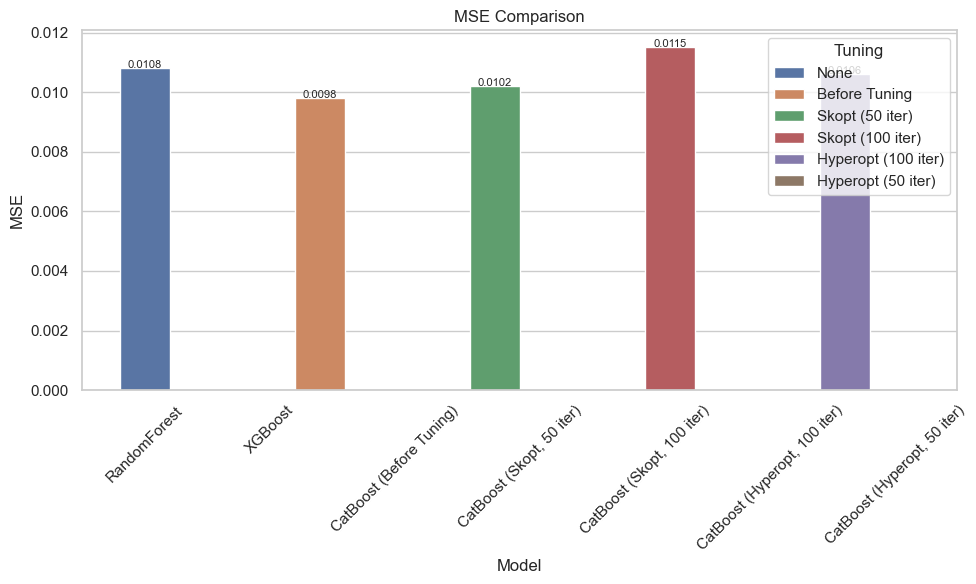

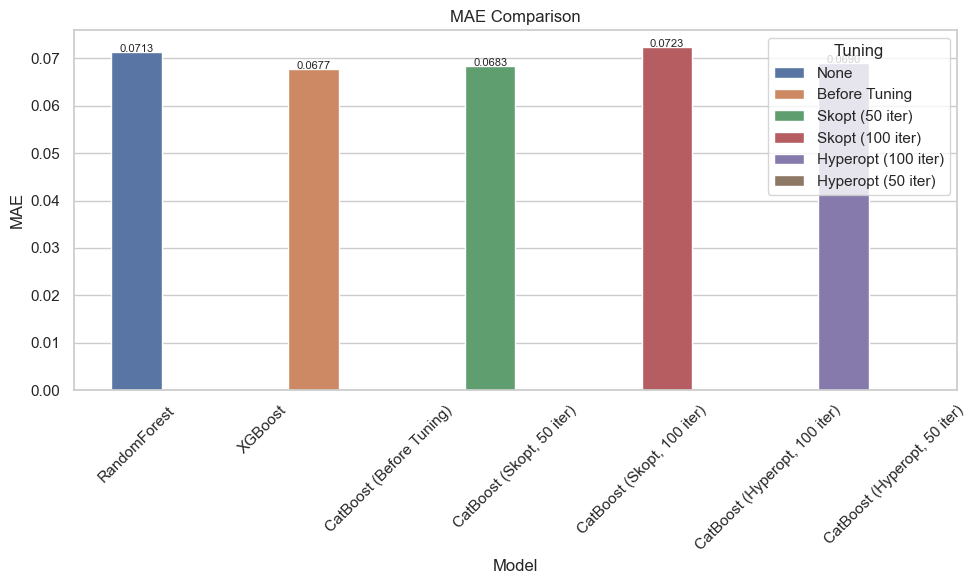

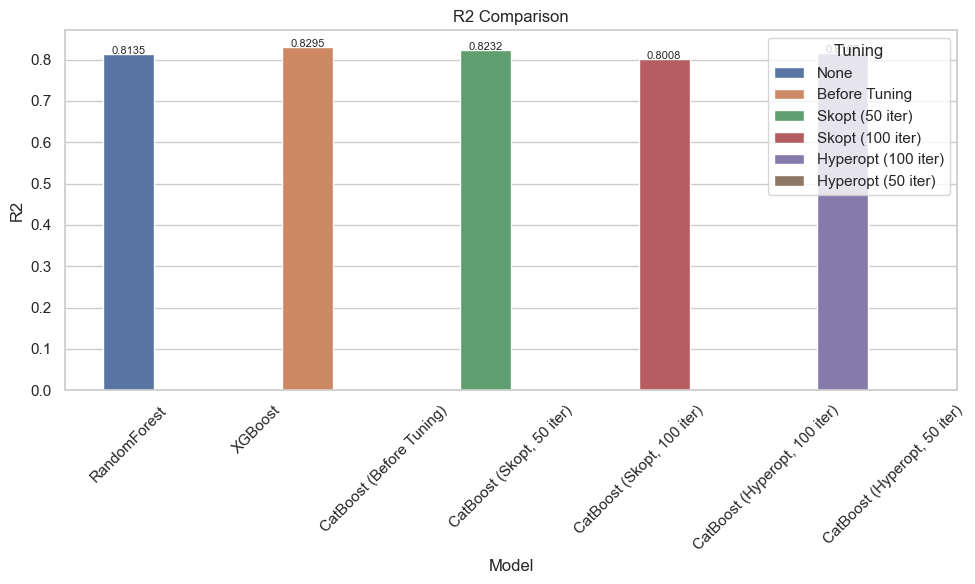

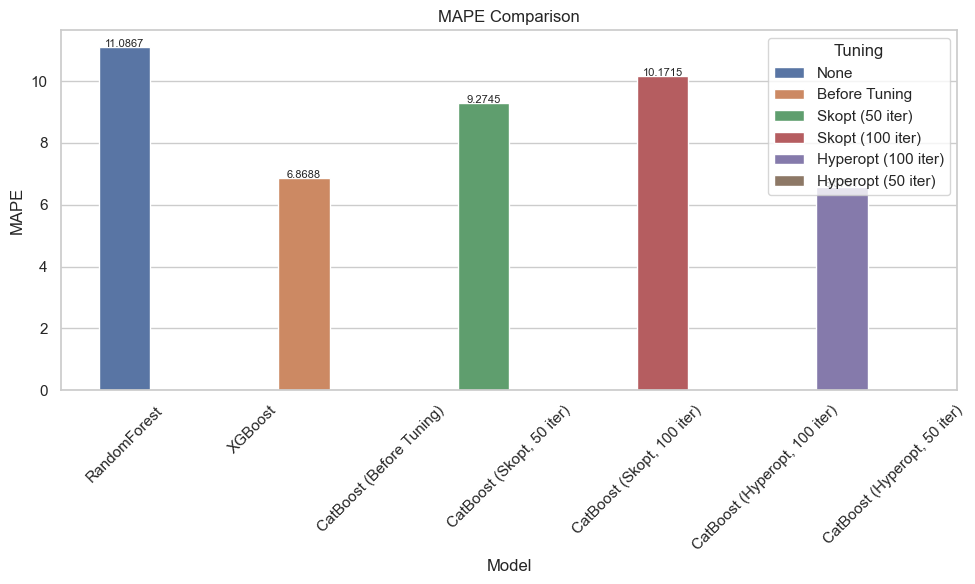

In [23]:
metrics = ['MSE', 'MAE', 'R2', 'MAPE']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Model', y=metric, hue='Tuning', data=df, width=2.4)  # Здесь задаем ширину столбцов
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title='Tuning')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=8) 

    plt.tight_layout()
    plt.show()